# Neural Network Classification


In this notebook we are going to learn, how to write neural network for classification problem.

> What is classification?

A classification is where you try to classify something as one thing or another
* Binary Classification
* Multiclass Classification
* Multilabel Classification

## Create data to view and fit

In [59]:
# Classic Import

from sklearn.datasets import make_circles
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

In [60]:
# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)
X[:10], y[:10]

(array([[ 0.75424625,  0.23148074],
        [-0.75615888,  0.15325888],
        [-0.81539193,  0.17328203],
        [-0.39373073,  0.69288277],
        [ 0.44220765, -0.89672343],
        [-0.47964637,  0.67643477],
        [-0.01364836,  0.80334872],
        [ 0.77151327,  0.14775959],
        [-0.16932234, -0.79345575],
        [-0.1214858 ,  1.02150905]]),
 array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0]))

In [61]:
# lets visualize the data

circle = pd.DataFrame({"X0": X[:, 0], "X1": X[:, 1], "label": y})
circle.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


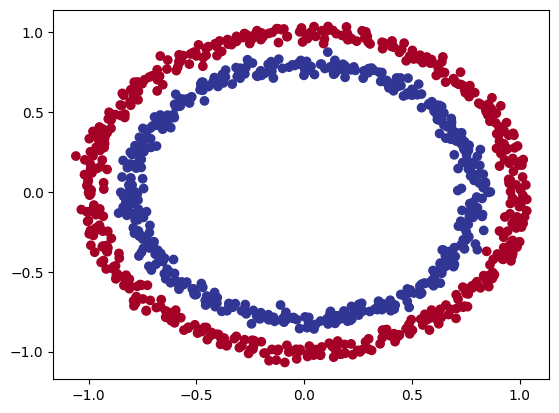

In [62]:
# lets use plot

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Inspect our data, Input and output shapes



In [63]:
X.shape, y.shape

((1000, 2), (1000,))

In [64]:
# view first example of feature and label
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

1) Get data ready, turn it into tensor
2) Build or pick a model
3) Fit the model to the data and make prediction
4) Evaluate the model
5) Improve through experiment

In [65]:
# set random seed
tf.random.set_seed(42)

# create a model with sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2) compile the model
model_1.compile(
    loss=tf.keras.losses.BinaryFocalCrossentropy,
    optimizer=tf.keras.optimizers.SGD(),
    metrics=["accuracy"]
)

model_1.fit(X, y, epochs=5)


Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 396us/step - accuracy: 0.5185 - loss: 6.3256 
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 369us/step - accuracy: 0.5362 - loss: 0.2034
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 390us/step - accuracy: 0.5379 - loss: 0.1765
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 336us/step - accuracy: 0.5339 - loss: 0.1733
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 360us/step - accuracy: 0.5085 - loss: 0.1733


# Improving the model

Since our model is gussing, we need to improve the model

1) Create a model: we might need to add more layers or increase the number of hidden units within a layer.
2) Compiling a mode: here we might choose a different optimization function such as adam instead of SGD
3) Fitting a model: Perhasp, we might fit our model for more epochs

In [83]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # add 100 dense neurons
  tf.keras.layers.Dense(10), # add another layer with 10 neurons
  tf.keras.layers.Dense(1)                             
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_2_history = model_2.fit(X, y, epochs=100, verbose=0)
     

In [84]:
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 438us/step - accuracy: 0.5043 - loss: 0.6915


[0.694909930229187, 0.4880000054836273]

<Axes: >

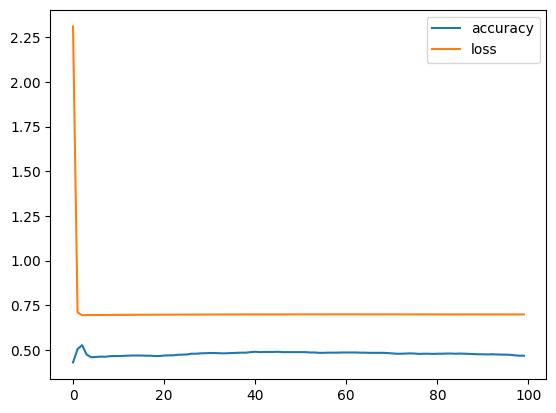

In [80]:
pd.DataFrame(model_2_history.history).plot()

## Visualize the prediction

To visualized or model's prediction, lets create a function `plot_decision_boundry()`, this function will:
* Take in trained model, feature X and labels y
* Create a meshgrid of different X values
* Make prediction across the meshgrid 
* Plot the prediction as well as a line between difference zone (where each unique class falls)

In [81]:
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model
    :param model: trained model 
    :param X: features
    :param y: labels
    :return: 
    """
    
    # Define the axis boundaries of the plot and create a meshgrid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
    
    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together
    
    # Make predictions
    y_pred = model.predict(x_in)
    
    # Check for multi-class
    if len(y_pred[0]) > 1:
        print("doing multiclass classification")
        # We have to reshape our prediction to get them ready for plotting
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
    else:
        print("doing binary classification")
        y_pred = np.round(y_pred).reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 245us/step
doing binary classification


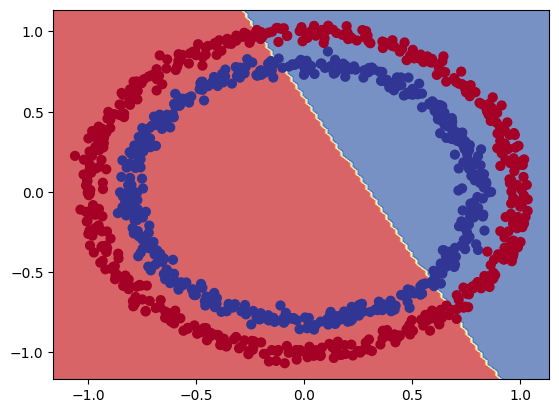

In [82]:
# check out prediction our model is making
plot_decision_boundary(model_2, X, y)